In [29]:
import warnings
warnings.filterwarnings('ignore')

import pandas                        as pd
import numpy                         as np
import matplotlib.pyplot             as plt
%matplotlib inline
import seaborn                       as sns

from sklearn                         import preprocessing
from sklearn.preprocessing           import normalize,StandardScaler,label
from sklearn.model_selection         import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn                         import metrics

# ML Libraries

from sklearn.ensemble                import RandomForestClassifier
from sklearn.decomposition           import PCA
from xgboost                         import XGBClassifier
from sklearn.linear_model            import LogisticRegression
from lightgbm                        import LGBMClassifier
from sklearn.tree                    import DecisionTreeClassifier
from sklearn.neighbors               import KNeighborsClassifier

from sklearn import datasets

# Dataset

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [30]:
df_X  = pd.DataFrame(X)
df_y = pd.DataFrame(y)
print(df_X.head())
print(df_y.head())

      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     20     21      22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  
0  0.4601  0.11890  
1 

In [31]:
df_X.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.30, random_state=7,shuffle=True)

In [87]:
print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

         0      1       2       3        4        5         6         7   \
543  13.210  28.06   84.88   538.4  0.08671  0.06877  0.029870  0.032750   
58   13.050  19.31   82.61   527.2  0.08060  0.03789  0.000692  0.004167   
436  12.870  19.54   82.67   509.2  0.09136  0.07883  0.017970  0.020900   
453  14.530  13.98   93.86   644.2  0.10990  0.09242  0.068950  0.064950   
4    20.290  14.34  135.10  1297.0  0.10030  0.13280  0.198000  0.104300   
..      ...    ...     ...     ...      ...      ...       ...       ...   
211  11.840  18.94   75.51   428.0  0.08871  0.06900  0.026690  0.013930   
502  12.540  16.32   81.25   476.3  0.11580  0.10850  0.059280  0.032790   
537  11.690  24.44   76.37   406.4  0.12360  0.15520  0.045150  0.045310   
196  13.770  22.29   90.63   588.9  0.12000  0.12670  0.138500  0.065260   
175   8.671  14.45   54.42   227.2  0.09138  0.04276  0.000000  0.000000   

         8        9   ...      20     21      22      23      24       25  \
543  0.162

In [77]:
#listing out the different ML Algorithms
models = []
models.append(('Random Forest with Entropy', RandomForestClassifier(criterion= "entropy", random_state= 111)))
models.append(('Random Forest with gini', RandomForestClassifier(criterion= "gini", random_state= 111)))
models.append(('XGBoost', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))
models.append(('DecisionTree with entropy', DecisionTreeClassifier(criterion= "entropy", random_state= 101)))
models.append(('DecisionTree with gini', DecisionTreeClassifier(criterion= "gini", random_state= 101)))
models.append(('Logistic Regression', LogisticRegression(random_state= 7)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))

In [78]:
#Predefined ROC Function
def ROCcurve(fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return (plt.show())

In [90]:
# Checking with Multiple accuracy metrics and check for Overfitting
def allmodels():
    model_list = pd.DataFrame(columns=("Model","Accuracy","F1Score","AUC"))
    rownumber = 0
    for name, model in models:
        classifier = model
        classifier.fit(X_train, y_train)
        # prediction
        Y_predict = classifier.predict(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train, pos_label=None)
        print(fpr)
        print(tpr)
        ROCcurve(fpr, tpr)
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"Accuracy"] = round(((accuracy_score(y_test,Y_predict))*100))
        model_list.loc[rownumber,"F1Score"]= round((f1_score(y_test,Y_predict)),2)
        model_list.loc[rownumber,"AUC"]= round((roc_auc_score(y_test,Y_predict)),2)
        Y_pt = classifier.predict(X_train)
        model_list.loc[rownumber,"Accuracy_Train"] = round(((accuracy_score(y_train,Y_pt))*100))
        model_list.loc[rownumber,"F1Score_Train"]= round((f1_score(y_train,Y_pt)),2)
        model_list.loc[rownumber,"AUC_Train"]= round((roc_auc_score(y_train,Y_pt)),2)
        rownumber += 1
    return (model_list.sort_values(by="AUC",ascending=False))

[0. 0. 1.]
[0. 1. 1.]


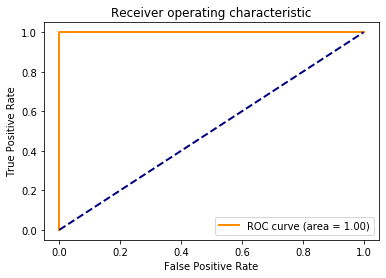

[0. 0. 1.]
[0. 1. 1.]


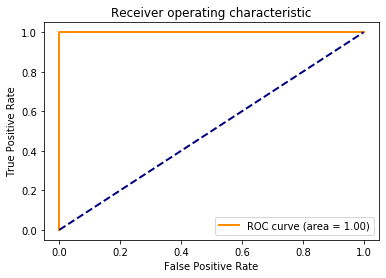

[0. 0. 1.]
[0. 1. 1.]


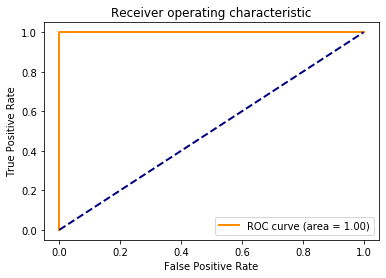

[0. 0. 1.]
[0. 1. 1.]


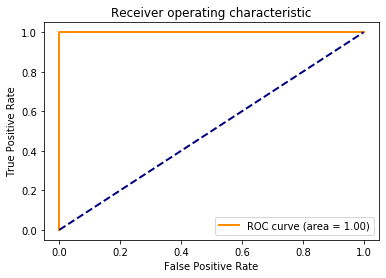

[0. 0. 1.]
[0. 1. 1.]


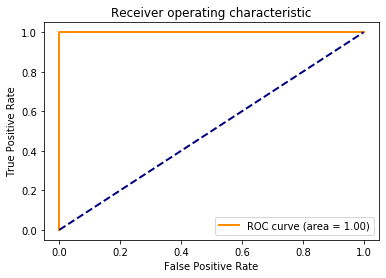

[0. 0. 1.]
[0. 1. 1.]


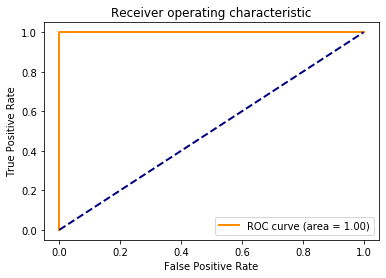

[0. 0. 1.]
[0. 1. 1.]


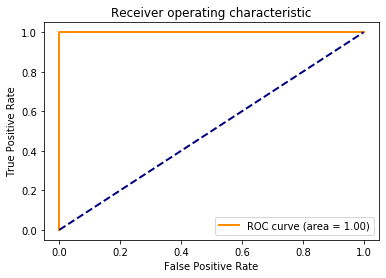

[0. 0. 1.]
[0. 1. 1.]


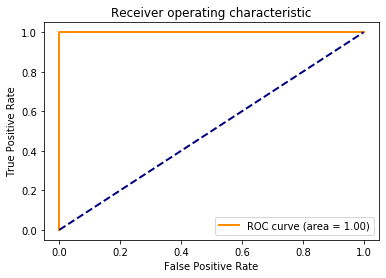

                        Model  Accuracy F1Score   AUC  Accuracy_Train  \
0  Random Forest with Entropy      96.0    0.97  0.96           100.0   
2                     XGBoost      98.0    0.98  0.96           100.0   
3                        LGBM      96.0    0.97  0.95           100.0   
4   DecisionTree with entropy      95.0    0.97  0.94           100.0   
7                         KNN      95.0    0.97  0.94            94.0   
1     Random Forest with gini      94.0    0.96  0.93           100.0   
6         Logistic Regression      95.0    0.96  0.92            97.0   
5      DecisionTree with gini      88.0    0.92  0.85           100.0   

   F1Score_Train  AUC_Train  
0           1.00       1.00  
2           1.00       1.00  
3           1.00       1.00  
4           1.00       1.00  
7           0.95       0.93  
1           1.00       1.00  
6           0.97       0.96  
5           1.00       1.00  


In [91]:
#Check for any overfitting
print (allmodels())